# Aranet Time-series Feature Extraction
The purpose of this notebook is to use feature extraction methods for picking our strongest regressors for predicting sequential time-series data for co2 levels.



In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime

# Load Data

In [480]:
# Load the .npz file
loaded_data = np.load('../datasets/windows.npz', allow_pickle=True)

# Convert the loaded data back to a dictionary of lists of NumPy arrays, excluding 'column_names'
windows = {label: list(arrays) for label, arrays in loaded_data.items() if label != 'column_names'}


for label, windows_list in windows.items():
    print(f"Label: {label}, Number of windows: {len(windows_list)}")

# Extract the column names
column_names = loaded_data['column_names']

# Convert the loaded data back to a dictionary of lists of DataFrames, using the column names
windows_df = {label: [pd.DataFrame(array, columns=column_names) for array in arrays_list] 
              for label, arrays_list in loaded_data.items() if label != 'column_names'}

# Loop through windows_df and set 'Datetime' as the index
for label, windows_list in windows_df.items():
    for i, window in enumerate(windows_list):
        # Convert 'Datetime' to a datetime object
        window['Datetime'] = pd.to_datetime(window['Datetime'])

        # Set 'Datetime' as the index
        windows_df[label][i] = window.set_index('Datetime')

Label: Chen, Number of windows: 12
Label: Song, Number of windows: 13


In [481]:
print(column_names)

['Datetime' 'co2' 'tempF' 'rhumid' 'atmpr' 'door1' 'door2' 'hvac'
 'subject_count' 'lecturer' 'co2_ma5' 'co2_ma10' 'co2_ma15' 'co2_ma30'
 'tempF_ma5' 'tempF_ma10' 'tempF_ma15' 'tempF_ma30' 'rhumid_ma5'
 'rhumid_ma10' 'rhumid_ma15' 'rhumid_ma30']


In [482]:
# Print the shape of each DataFrame in the windows dictionary
for label, windows_list in windows.items():
    print(f"Label: {label}")
    for i, window in enumerate(windows_list):
        print(f"Window {i}: {window.shape}")


Label: Chen
Window 0: (76, 22)
Window 1: (76, 22)
Window 2: (76, 22)
Window 3: (76, 22)
Window 4: (76, 22)
Window 5: (76, 22)
Window 6: (76, 22)
Window 7: (76, 22)
Window 8: (76, 22)
Window 9: (76, 22)
Window 10: (76, 22)
Window 11: (76, 22)
Label: Song
Window 0: (76, 22)
Window 1: (76, 22)
Window 2: (76, 22)
Window 3: (76, 22)
Window 4: (76, 22)
Window 5: (76, 22)
Window 6: (76, 22)
Window 7: (76, 22)
Window 8: (76, 22)
Window 9: (76, 22)
Window 10: (76, 22)
Window 11: (76, 22)
Window 12: (76, 22)


In [483]:
windows['Chen'][0][:]

array([[Timestamp('2024-03-14 08:00:00'), 595.0, 65.8, ..., 40.9,
        40.93333333333333, 41.53333333333333],
       [Timestamp('2024-03-14 08:01:00'), 597.0, 66.4, ..., 40.7, 40.8,
        41.4],
       [Timestamp('2024-03-14 08:02:00'), 584.0, 66.8, ..., 40.5,
        40.666666666666664, 41.166666666666664],
       ...,
       [Timestamp('2024-03-14 09:13:00'), 540.0, 72.4, ..., 35.6, 35.2,
        35.1],
       [Timestamp('2024-03-14 09:14:00'), 515.0, 72.9, ..., 35.9,
        35.333333333333336, 35.166666666666664],
       [Timestamp('2024-03-14 09:15:00'), 518.0, 73.2, ..., 36.2,
        35.46666666666667, 35.233333333333334]], dtype=object)

In [484]:
windows_df['Chen'][0]

,co2,tempF,rhumid,atmpr,door1,door2,hvac,subject_count,lecturer,co2_ma5,...,co2_ma15,co2_ma30,tempF_ma5,tempF_ma10,tempF_ma15,tempF_ma30,rhumid_ma5,rhumid_ma10,rhumid_ma15,rhumid_ma30
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-03-14 08:00:00,595.0,65.8,40.0,1017.0,1,1,1,10.0,0,585.4,...,599.0,690.466667,64.38,63.67,63.953333,66.53,40.8,40.9,40.933333,41.533333
2024-03-14 08:01:00,597.0,66.4,39.0,1016.9,1,1,1,10.0,0,589.0,...,596.933333,681.833333,65.08,63.96,64.026667,66.4,40.2,40.7,40.8,41.4
2024-03-14 08:02:00,584.0,66.8,39.0,1016.9,1,1,0,16.0,0,589.4,...,594.2,670.933333,65.7,64.32,64.153333,66.28,39.8,40.5,40.666667,41.166667
2024-03-14 08:03:00,611.0,67.2,39.0,1017.0,1,1,0,16.0,0,594.2,...,595.133333,660.966667,66.26,64.74,64.333333,66.16,39.4,40.3,40.533333,41.0
2024-03-14 08:04:00,577.0,67.5,39.0,1017.0,1,1,0,16.0,0,592.8,...,593.2,650.233333,66.74,65.22,64.56,66.043333,39.2,40.1,40.4,40.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-14 09:11:00,543.0,71.9,37.0,1017.5,1,1,1,18.0,0,614.2,...,645.8,643.166667,71.32,70.88,70.72,70.49,36.0,35.1,35.0,35.0
2024-03-14 09:12:00,545.0,72.1,36.0,1017.5,1,1,1,18.0,0,592.2,...,638.666667,640.2,71.56,71.05,70.833333,70.556667,36.2,35.3,35.066667,35.033333
2024-03-14 09:13:00,540.0,72.4,37.0,1017.5,1,1,1,18.0,0,567.2,...,630.733333,637.366667,71.82,71.25,70.966667,70.636667,36.4,35.6,35.2,35.1


# Numpy Tensor

In [485]:
# Initialize a list to store the 3D arrays and labels
X_list = []
y_list = []

for label, windows_list in windows.items():
    for window in windows_list:
        # Convert each DataFrame to a NumPy array and append to the list
        X_list.append(window)
        # Append the corresponding label to the label list
        y_list.append(label)

# Convert the list of 3D arrays to a single 3D array (tensor)
X = np.array(X_list)

# Convert the label list to a NumPy array
y = np.array(y_list)

# Print the shapes of the resulting arrays
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (25, 76, 22)
Shape of y: (25,)


In [486]:
# Drop the first and the last columns from the 3D array X
X = X[:, :, 1:-1]

# Verify the new shape of X
print(f"New shape of X: {X.shape}")



New shape of X: (25, 76, 20)


In [487]:
X_reshaped = X.reshape(-1, X.shape[-1])
print(f"Reshaped X to: {X_reshaped.shape}")
X_original_shape = X_reshaped.reshape(X.shape)
print(f"Reshaped back to original shape: {X_original_shape.shape}")


Reshaped X to: (1900, 20)
Reshaped back to original shape: (25, 76, 20)


In [488]:
y

array(['Chen', 'Chen', 'Chen', 'Chen', 'Chen', 'Chen', 'Chen', 'Chen',
       'Chen', 'Chen', 'Chen', 'Chen', 'Song', 'Song', 'Song', 'Song',
       'Song', 'Song', 'Song', 'Song', 'Song', 'Song', 'Song', 'Song',
       'Song'], dtype='<U4')

In [489]:
y[0],X[0]

('Chen',
 array([[595.0, 65.8, 40.0, ..., 40.8, 40.9, 40.93333333333333],
        [597.0, 66.4, 39.0, ..., 40.2, 40.7, 40.8],
        [584.0, 66.8, 39.0, ..., 39.8, 40.5, 40.666666666666664],
        ...,
        [540.0, 72.4, 37.0, ..., 36.4, 35.6, 35.2],
        [515.0, 72.9, 37.0, ..., 36.6, 35.9, 35.333333333333336],
        [518.0, 73.2, 37.0, ..., 36.8, 36.2, 35.46666666666667]],
       dtype=object))

## Sequential Classifier

Note that adding features such as moving averages was an easy way to increase the metrics of this model. We should discuss it further.

Test-train-split

In [490]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = X.astype(np.float64)
# Encode labels: 'Song' as 1, 'Chen' as 0
y = np.array([1 if label == 'Song' else 0 for label in y])
# Scale the features using StandardScaler

# Reshape X to 2D array
X_2d = X.reshape(-1, X.shape[-1])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

# Reshape X_scaled back to 3D array
X_scaled_3d = X_scaled.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split into training and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_3d, y, test_size=6, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (19, 76, 20)
y_train shape: (19,)
X_test shape: (6, 76, 20)
y_test shape: (6,)


In [491]:
import tensorflow as tf

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[76,20]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='softmax'))

In [492]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_24 (Flatten)        (None, 1520)              0         
                                                                 
 dense_72 (Dense)            (None, 128)               194688    
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dense_74 (Dense)            (None, 32)                2080      
                                                                 
Total params: 205024 (800.88 KB)
Trainable params: 205024 (800.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [493]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7


1/1 [==============================] - 0s 353ms/step - loss: 3.8745 - accuracy: 0.1579 - val_loss: 3.2681 - val_accuracy: 0.5000
Epoch 2/7
1/1 [==============================] - 0s 21ms/step - loss: 2.7366 - accuracy: 0.4737 - val_loss: 2.7054 - val_accuracy: 0.5000
Epoch 3/7
1/1 [==============================] - 0s 22ms/step - loss: 1.8961 - accuracy: 0.6316 - val_loss: 2.2521 - val_accuracy: 0.6667
Epoch 4/7
1/1 [==============================] - 0s 21ms/step - loss: 1.3483 - accuracy: 0.7895 - val_loss: 1.9189 - val_accuracy: 0.6667
Epoch 5/7
1/1 [==============================] - 0s 22ms/step - loss: 0.9860 - accuracy: 0.8947 - val_loss: 1.6828 - val_accuracy: 0.8333
Epoch 6/7
1/1 [==============================] - 0s 21ms/step - loss: 0.7592 - accuracy: 0.9474 - val_loss: 1.5029 - val_accuracy: 0.8333
Epoch 7/7
1/1 [==============================] - 0s 21ms/step - loss: 0.6098 - accuracy: 0.9474 - val_loss: 1.3587 - val_accuracy: 0.8333


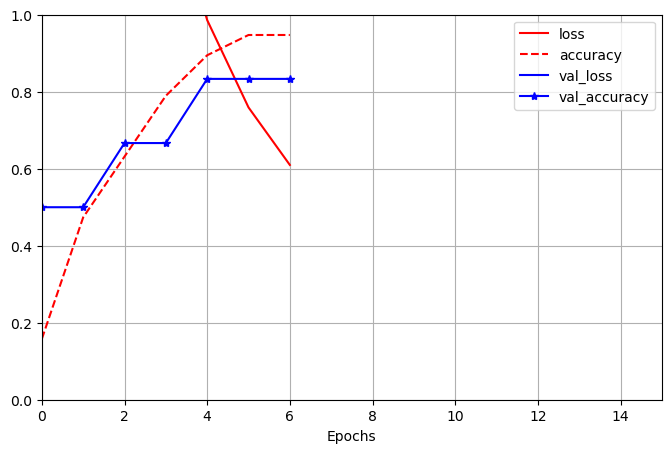

In [494]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 15], ylim=[0, 1], xlabel='Epochs', grid=True,
    style=['r', 'r--', 'b', 'b-*'])
plt.show()

In [495]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 22ms/step - loss: 1.3587 - accuracy: 0.8333


[1.3586736917495728, 0.8333333134651184]

In [496]:
y_proba = model.predict(X_test)
y_proba.round(2)

1/1 [==============================] - 0s 42ms/step


array([[0.17, 0.04, 0.02, 0.07, 0.02, 0.01, 0.01, 0.03, 0.01, 0.03, 0.  ,
        0.08, 0.01, 0.01, 0.03, 0.07, 0.05, 0.02, 0.05, 0.01, 0.05, 0.01,
        0.05, 0.03, 0.01, 0.01, 0.02, 0.01, 0.03, 0.  , 0.01, 0.03],
       [0.01, 0.35, 0.06, 0.02, 0.01, 0.01, 0.01, 0.05, 0.02, 0.  , 0.01,
        0.01, 0.02, 0.01, 0.01, 0.03, 0.05, 0.03, 0.04, 0.01, 0.04, 0.02,
        0.02, 0.02, 0.02, 0.02, 0.01, 0.02, 0.02, 0.04, 0.  , 0.02],
       [0.  , 0.8 , 0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.01, 0.  , 0.  , 0.  , 0.01, 0.07, 0.  , 0.03, 0.  , 0.01, 0.  ,
        0.01, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.77, 0.01, 0.  , 0.02, 0.  , 0.01, 0.02, 0.01, 0.  , 0.  ,
        0.  , 0.01, 0.01, 0.01, 0.01, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ,
        0.01, 0.02, 0.01, 0.01, 0.  , 0.  , 0.01, 0.01, 0.  , 0.01],
       [0.63, 0.02, 0.  , 0.06, 0.02, 0.  , 0.02, 0.02, 0.  , 0.  , 0.  ,
        0.02, 0.  , 0.  , 0.03, 0.03, 0.01, 0.01, 0.  , 0.

In [497]:
y_pred = np.argmax(y_proba, axis=1)
y_pred, y_test

(array([0, 1, 1, 1, 0, 1], dtype=int64), array([0, 1, 1, 1, 0, 0]))

In [498]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    # Return metrics as a dictionary
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

# Example usage
metrics = evaluate_classification(y_test, y_pred)


Accuracy: 0.8333
Precision: 0.7500
Recall: 1.0000
F1-score: 0.8571


# RNN Sequential